In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import linear_model, datasets
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, CategoricalNB
warnings.filterwarnings('ignore')

In [84]:
#Load dataset
Grid_QOL = pd.read_csv(r'C:\Users\Aaron\Downloads\QOLdataCombined.csv')

In [94]:
#Display beginning data points
Grid_QOL.head()

,Unnamed: 0,Age_of_Residents_2019,White_Population_2020,Black_Population_2020,Asian_Population_2020,All_Other_Races_2020,Hispanic_Latino_2020,High_School_Diploma_2019,Student Absenteeism 2019,Grocery_Proximity_2019,Home_Ownership_2019,Violent_Crime_Rate_2018,Property_Crime_Rate_2018,Voter_Participation_2020,Quality of Life Metric
0,2,30,59.78,20.91,1.73,7.00,10.59,88,0.19,27.95,35,6.7,44.1,71,0.645258
1,3,34,79.00,6.67,4.54,4.45,5.35,97,0.04,35.83,46,3.9,69.5,75,0.763501
2,4,50,88.44,1.63,4.28,2.74,2.91,100,0.06,18.29,96,0.0,12.5,87,0.818602
3,5,36,10.75,71.24,1.17,4.53,12.31,82,0.25,22.03,19,11.7,45.3,47,0.593606
4,6,35,14.64,70.90,0.50,3.84,10.13,68,0.23,66.67,37,27.7,102.2,53,0.689710


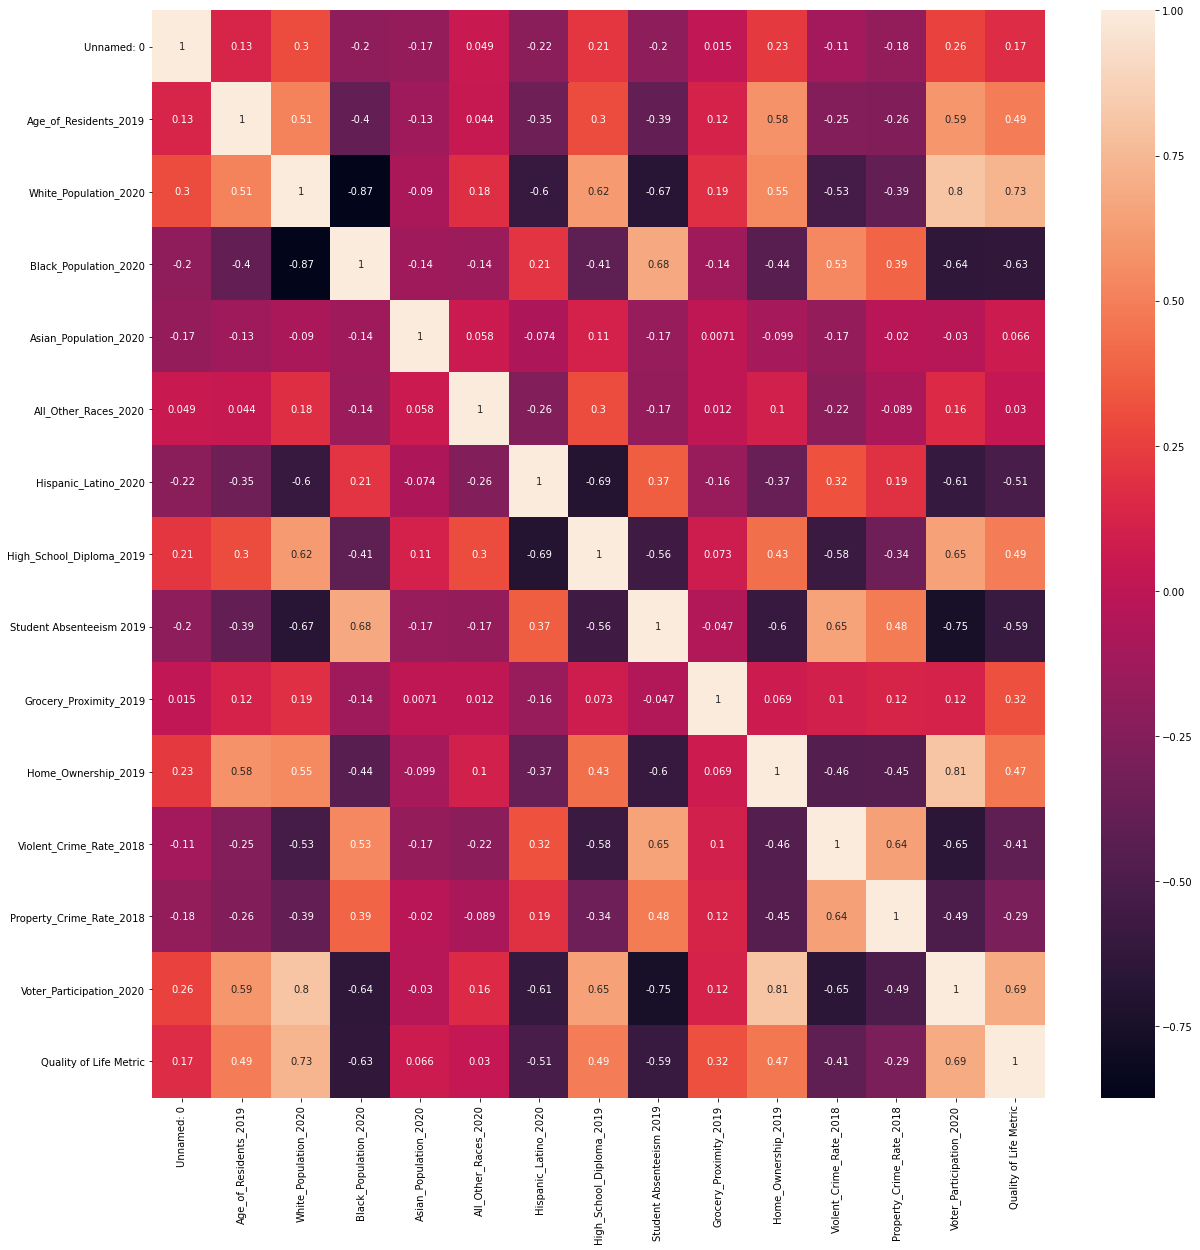

In [235]:
corrMat = Grid_QOL.corr()
sns.heatmap(corrMat, annot=True)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

In [238]:
#
#Separate data into input and output
X = Grid_QOL.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13]].values
Y = Grid_QOL.iloc[:, 14].values

In [168]:
#Split into training and test data
rand = np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, train_size = 0.8, random_state = rand)

In [104]:
#Standardize training/test data
#sc_X = StandardScaler()
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.fit_transform(X_test)

In [105]:
LG = linear_model.LinearRegression()

In [106]:
LG.fit(X_train, Y_train)

LinearRegression()

In [107]:
LG.coef_

array([ 9.71445222e-04, -1.86402126e-01, -1.87594949e-01, -1.86147237e-01,
       -1.94579805e-01, -1.88005397e-01, -1.56642932e-04, -6.86272793e-02,
        7.86358787e-04, -3.61873845e-04,  9.51371935e-04, -1.13199163e-04,
        2.62961750e-03])

In [108]:
LGpred = LG.predict(X_test)

In [109]:
# The coefficients
print("Coefficients: \n", LG.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, LGpred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, LGpred))

Coefficients: 
 [ 9.71445222e-04 -1.86402126e-01 -1.87594949e-01 -1.86147237e-01
 -1.94579805e-01 -1.88005397e-01 -1.56642932e-04 -6.86272793e-02
  7.86358787e-04 -3.61873845e-04  9.51371935e-04 -1.13199163e-04
  2.62961750e-03]
Mean squared error: 0.00
Coefficient of determination: 0.61


In [110]:
Ridge = linear_model.Ridge(alpha=0.5)

In [111]:
Ridge.fit(X_train, Y_train)

Ridge(alpha=0.5)

In [112]:
Ridgepred = Ridge.predict(X_test)

In [113]:
# The coefficients
print("Coefficients: \n", Ridge.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Ridgepred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, Ridgepred))

Coefficients: 
 [ 9.62248114e-04  1.16500339e-03 -5.32343976e-05  1.45359272e-03
 -6.98744990e-03 -4.26876407e-04 -1.34407920e-04 -3.46072660e-02
  7.88986132e-04 -3.54211803e-04  9.25469784e-04 -1.17465460e-04
  2.72849923e-03]
Mean squared error: 0.00
Coefficient of determination: 0.60


In [123]:
RidgeCV = linear_model.RidgeCV(alphas = np.logspace(-5, 5, 12))

In [124]:
RidgeCV.fit(X_train, Y_train)

RidgeCV(alphas=array([1.00000000e-05, 8.11130831e-05, 6.57933225e-04, 5.33669923e-03,
       4.32876128e-02, 3.51119173e-01, 2.84803587e+00, 2.31012970e+01,
       1.87381742e+02, 1.51991108e+03, 1.23284674e+04, 1.00000000e+05]),
        cv=10)

In [125]:
RidgeCVpred = RidgeCV.predict(X_test)

In [126]:
# The coefficients
print("Coefficients: \n", RidgeCV.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, RidgeCVpred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, RidgeCVpred))

Coefficients: 
 [ 9.23216676e-04  1.17301581e-03 -1.32860019e-04  1.26470819e-03
 -1.84497241e-03 -4.61637343e-04 -1.93006643e-04 -2.78941809e-05
  8.15031793e-04 -2.19992636e-04  6.64241108e-04 -1.20526276e-04
  2.21093619e-03]
Mean squared error: 0.00
Coefficient of determination: 0.59


In [159]:
Lasso = linear_model.Lasso(alpha=0.001)

In [160]:
Lasso.fit(X_train, Y_train)

Lasso(alpha=0.001)

In [161]:
Lassopred = Lasso.predict(X_test)

In [162]:
# The coefficients
print("Coefficients: \n", Lasso.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Lassopred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, Lassopred))

Coefficients: 
 [ 9.38753116e-04  1.24835986e-03 -0.00000000e+00  1.54094328e-03
 -6.29916204e-03 -3.02888003e-04 -9.22525564e-05 -0.00000000e+00
  7.88470885e-04 -3.32356522e-04  8.13391000e-04 -1.15046372e-04
  2.77487619e-03]
Mean squared error: 0.00
Coefficient of determination: 0.59


In [169]:
LassoCV = linear_model.LassoCV(alphas = np.logspace(-5, 5, 12))

In [170]:
LassoCV.fit(X_train, Y_train)

LassoCV(alphas=array([1.00000000e-05, 8.11130831e-05, 6.57933225e-04, 5.33669923e-03,
       4.32876128e-02, 3.51119173e-01, 2.84803587e+00, 2.31012970e+01,
       1.87381742e+02, 1.51991108e+03, 1.23284674e+04, 1.00000000e+05]))

In [171]:
LassoCVpred = LassoCV.predict(X_test)

In [172]:
# The coefficients
print("Coefficients: \n", LassoCV.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, LassoCVpred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, LassoCVpred))

Coefficients: 
 [ 9.43102605e-04  1.24718425e-03 -0.00000000e+00  1.55416617e-03
 -6.49296961e-03 -3.07061162e-04 -9.42757235e-05 -0.00000000e+00
  7.87495108e-04 -3.38108427e-04  8.41502992e-04 -1.17412582e-04
  2.79956323e-03]
Mean squared error: 0.00
Coefficient of determination: 0.59


In [173]:
Elastic = linear_model.ElasticNet(alpha = 0.1, l1_ratio = 0.7)

In [174]:
Elastic.fit(X_train, Y_train)

ElasticNet(alpha=0.1, l1_ratio=0.7)

In [175]:
Elasticpred = Elastic.predict(X_test)

In [176]:
# The coefficients
print("Coefficients: \n", Elastic.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Elasticpred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, Elasticpred))

Coefficients: 
 [ 0.00000000e+00  1.60794787e-03 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -1.62524358e-04  0.00000000e+00 -0.00000000e+00
  6.69838089e-04  1.40310120e-04 -0.00000000e+00 -3.59052253e-05
  5.11407330e-04]
Mean squared error: 0.00
Coefficient of determination: 0.57


In [179]:
Lars = linear_model.Lars()

In [180]:
Lars.fit(X_train, Y_train)

Lars()

In [181]:
Larspred = Lars.predict(X_test)

In [182]:
# The coefficients
print("Coefficients: \n", Lars.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Larspred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, Larspred))

Coefficients: 
 [ 9.71445222e-04 -1.86402131e-01 -1.87594955e-01 -1.86147243e-01
 -1.94579811e-01 -1.88005402e-01 -1.56642932e-04 -6.86272793e-02
  7.86358787e-04 -3.61873845e-04  9.51371935e-04 -1.13199163e-04
  2.62961750e-03]
Mean squared error: 0.00
Coefficient of determination: 0.61


In [187]:
LarsLasso = linear_model.LassoLars(alpha = 0.1, normalize = False)

In [188]:
LarsLasso.fit(X_train, Y_train)

LassoLars(alpha=0.1, normalize=False)

In [189]:
LarsLassopred = LarsLasso.predict(X_test)

In [190]:
# The coefficients
print("Coefficients: \n", LarsLasso.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, LarsLassopred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, LarsLassopred))

Coefficients: 
 [ 0.00000000e+00  1.73068281e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.70726035e-05  0.00000000e+00  0.00000000e+00
  5.67499923e-04  2.29558575e-04  0.00000000e+00 -9.84127874e-06
  0.00000000e+00]
Mean squared error: 0.00
Coefficient of determination: 0.56


In [191]:
BayesRidge = linear_model.BayesianRidge()

In [192]:
BayesRidge.fit(X_train, Y_train)

BayesianRidge()

In [193]:
BayesRidgepred = BayesRidge.predict(X_test)

In [194]:
# The coefficients
print("Coefficients: \n", BayesRidge.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, BayesRidgepred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, BayesRidgepred))

Coefficients: 
 [ 9.34087258e-04  1.25378170e-03 -3.76163825e-05  1.39644588e-03
 -2.25556415e-03 -3.59426427e-04 -1.90384660e-04 -3.62750185e-05
  8.10715258e-04 -2.49937133e-04  7.42092342e-04 -1.23072497e-04
  2.36298754e-03]
Mean squared error: 0.00
Coefficient of determination: 0.59


In [207]:
ARD = linear_model.ARDRegression(threshold_lambda=3e5)

In [208]:
ARD.fit(X_train, Y_train)

ARDRegression(threshold_lambda=300000.0)

In [209]:
ARDpred = ARD.predict(X_test)

In [210]:
# The coefficients
print("Coefficients: \n", ARD.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, ARDpred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, ARDpred))

Coefficients: 
 [ 0.          0.          0.          0.         -0.00552417  0.
  0.         -0.11450186  0.          0.          0.          0.
  0.00486786]
Mean squared error: 0.00
Coefficient of determination: 0.43


In [213]:
PAR = linear_model.PassiveAggressiveRegressor()

In [214]:
PAR.fit(X_train, Y_train)

PassiveAggressiveRegressor()

In [215]:
PARpred = PAR.predict(X_test)

In [216]:
# The coefficients
print("Coefficients: \n", PAR.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, PARpred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, PARpred))

Coefficients: 
 [ 1.65066457e-03  1.70981912e-03  1.25450160e-03  8.66125866e-04
  5.95692487e-05  1.97833542e-03  2.92346484e-03  1.18599428e-05
  6.49743382e-04 -4.05124602e-04  9.98304436e-04  1.35262155e-04
  2.85363036e-03]
Mean squared error: 0.00
Coefficient of determination: 0.49


In [245]:
metrics = ['accuracy', 'precision', 'recall']
kfold = KFold(shuffle = True, random_state = 0, n_splits=5)
results = cross_validate(LG, X, Y, cv = kfold, scoring = metrics, n_jobs = -1)

In [246]:
#Display Linear regression metrics for K = 5
print("Accuracy:", results['test_accuracy']) 
print("Precision:", results['test_precision'])
print("Recall:", results['test_recall'])

Accuracy: [nan nan nan nan nan]
Precision: [nan nan nan nan nan]
Recall: [nan nan nan nan nan]
